In [1]:
from mplsoccer import Pitch, FontManager, Sbopen
import matplotlib.patheffects as path_effects
import pandas as pd

# lee el archivo de Excel en un DataFrame de pandas
df = pd.read_excel('England_Premier-League_2022-2023_Liverpool_vs_Arsenal.xlsx')

# filter the dataset to completed passes for team 1
mask_team1 = (df.type == 'Pass') & (df.team == "Arsenal") & (df.outcomeType == "Successful")
df_pass = df.loc[mask_team1, ['x', 'y', 'endX', 'endY', 'outcomeType']]

# load a custom font from google fonts
fm = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/sedgwickave/'
                 'SedgwickAve-Regular.ttf')

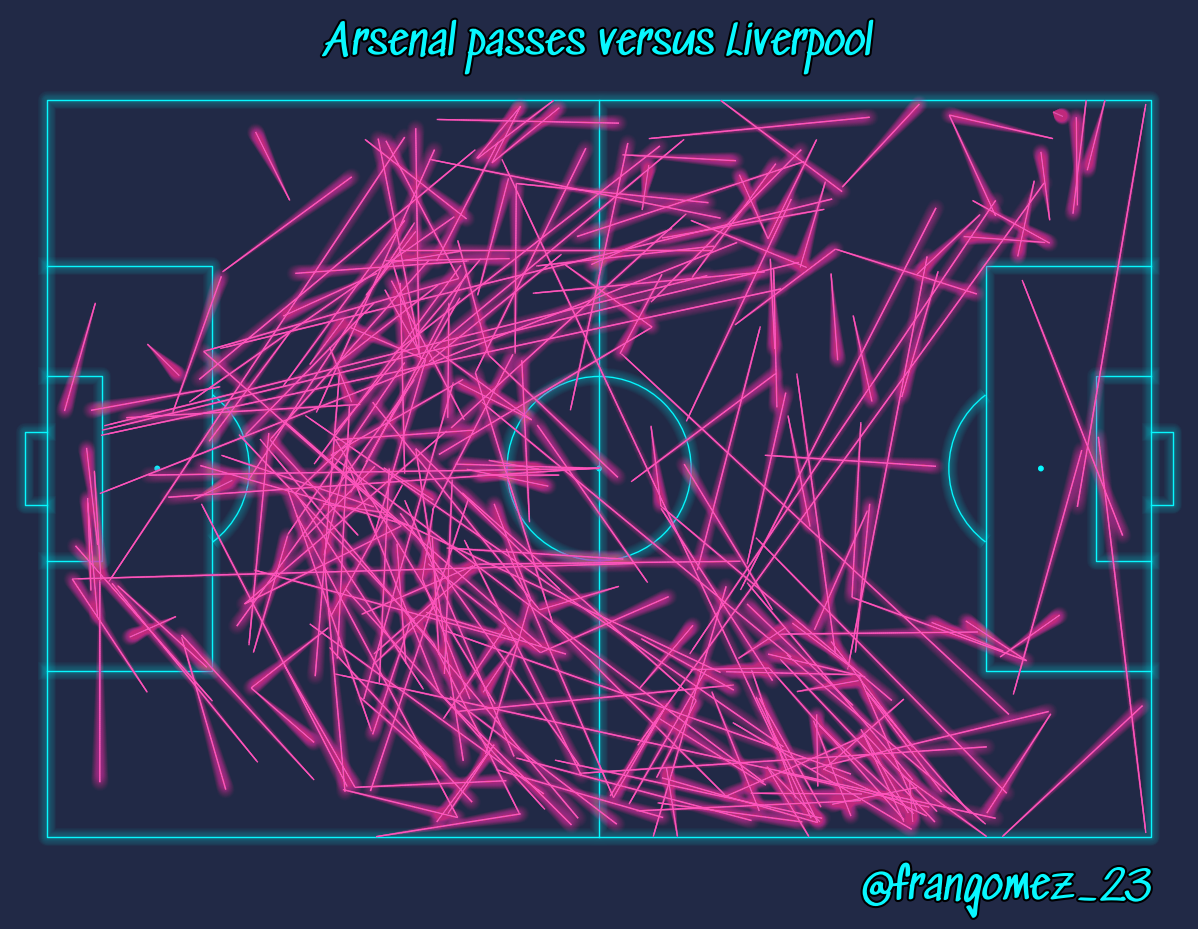

In [2]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

#aqui adaptamos a 120x y 80y ya que los datos que tenemos estan en 100x100
df_pass["x"] = df_pass["x"]*1.2
df_pass["y"] = df_pass["y"] *0.8
df_pass["endX"] = df_pass["endX"]*1.2
df_pass["endY"] = df_pass["endY"] *0.8

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'

# plot as initial pitch and the lines with alpha=1
# I have used grid to get a title and endnote axis automatically, but you could you pitch.draw()
pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
fig.set_facecolor(BACKGROUND_COLOR)
pitch.lines(df_pass.x, df_pass.y,
            df_pass.endX, df_pass.endY,
            capstyle='butt',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=PASS_COLOR, comet=True, ax=ax['pitch'])

# plotting the titles and endnote
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
ax['title'].text(0.5, 0.3, f'{"Arsenal"} passes versus {"Liverpool"}',
                 path_effects=text_effects,
                 va='center', ha='center', color=LINE_COLOR, fontsize=30, fontproperties=fm.prop)
ax['endnote'].text(1, 0.5, '@frangomez_23', va='center', path_effects=text_effects,
                   ha='right', color=LINE_COLOR, fontsize=30, fontproperties=fm.prop)


# plotting the glow effect. it is essentially a loop that plots the line with
# a low alpha (transparency) value and gradually increases the linewidth.
# This way the center will have more color than the outer area.
# you could break this up into two loops if you wanted the pitch lines to have wider glow
for i in range(1, NUM_GLOW_LINES + 1):
    pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                  linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                  line_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_type='box')
    pitch.draw(ax=ax['pitch'])  # we plot on-top of our previous axis from pitch.grid
    pitch.lines(df_pass.x, df_pass.y,
                df_pass.endX, df_pass.endY,
                linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=PASS_COLOR, comet=True, ax=ax['pitch'])